# P2 - Data Mining

Alunos: Lucas Andrade, Rachel Maranhão, Renan Stellet

Fontes:
    <https://www.kaggle.com/jsphyg/weather-dataset-rattle-package>

Objetivo: Prever se choverá no dia seguinte


# Importação e Primeiros exames dos dados

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import minmax_scale

In [2]:
data = pd.read_csv("dados/rain/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(145460, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


As colunas "MaxTemp", "Rainfall", "Evaporation", "WindSpeed9am" parecem conter outliers, já que seus valores máximos parecem distantes da média.

Elas serão melhor examinadas.

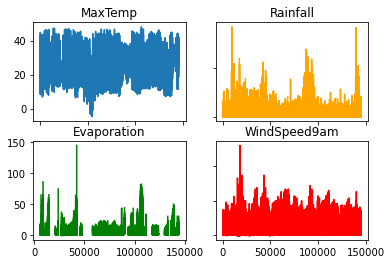

In [6]:
to_exam = ["MaxTemp", "Rainfall", "Evaporation", "WindSpeed9am"]

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data[to_exam[0]])
axs[0, 0].set_title(to_exam[0])

axs[0, 1].plot(data[to_exam[1]], color="orange")
axs[0, 1].set_title(to_exam[1])

axs[1, 0].plot(data[to_exam[2]], color="green")
axs[1, 0].set_title(to_exam[2])

axs[1, 1].plot(data[to_exam[3]], color="red")
axs[1, 1].set_title(to_exam[3])

for ax in fig.get_axes():
    ax.label_outer()

Apenas a coluna "Evaporation" parece conter um outlier que prejudique a estimação, esse valor será retirado da amostra.

In [7]:
print(data["Evaporation"].idxmax(), data["Evaporation"].max())
data = data.drop(index=data["Evaporation"].idxmax())
print(data["Evaporation"].idxmax(), data["Evaporation"].max())

42358 145.0
8831 86.2


# Limpeza e conversão dos Dados 

In [8]:
maskYesNoTo10 = {
    "No": 0,
    "Yes": 1
}

data["RainTomorrow"] = data["RainTomorrow"].map(maskYesNoTo10).dropna()
data["RainToday"] = data["RainToday"].map(maskYesNoTo10).dropna()

data["Date"] = pd.to_datetime(data["Date"])

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145459 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145459 non-null  datetime64[ns]
 1   Location       145459 non-null  object        
 2   MinTemp        143974 non-null  float64       
 3   MaxTemp        144198 non-null  float64       
 4   Rainfall       142198 non-null  float64       
 5   Evaporation    82669 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141231 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142397 non-null  float64       
 13  Humidity9am    142805 non-null  float64       
 14  Humidity3pm    140952 non-null  float64       
 15  

As colunas "Date", "WindGustDir", "WindDir9am" e "WindDir3pm" serão descartadas, pois não são consideradas relevantes pros modelos aqui usados.

In [10]:
data_reduced = data.drop(columns=["Location", "Date", "WindGustDir", "WindDir9am", "WindDir3pm"])
data_reduced = data_reduced.dropna()
data_reduced

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0


# Hipótese

Mudanças abruptas de temperatura e humidade também podem ser bons preditores da chuva, pois podem captar a chegada de nuvens de chuva.

Portanto, serão criadas as variáveis 'TempDiff' e 'HumidityDiff'.

In [11]:
data_reduced["TempDiff"] = data_reduced["Temp3pm"] - data_reduced["Temp9am"]
data_reduced["HumidityDiff"] = data_reduced["Humidity3pm"] - data_reduced["Humidity9am"]
data_reduced.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,TempDiff,HumidityDiff
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,6.8,-7.0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,6.7,-22.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,6.2,-20.0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,6.5,-15.0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0,4.0,-4.0


# Modelos

## Estratégia Ingênua

Agora, avaliaremos as proporções da variável dependente nos dados de treino.

In [12]:
naiveData = data_reduced["RainTomorrow"].value_counts()
naive = [naiveData[0] / sum(naiveData), naiveData[1] / sum(naiveData)]
naive

[0.7808745050783268, 0.21912549492167327]

A variável alvo é 0 em 78% das vezes. Portanto, se sempre supormos que não choverá, então teremos uma chance de acerto de aproximadamente 78%, essa estratégia será chamada de ingênua e será nosso modelo base.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_reduced.drop(columns="RainTomorrow"), data_reduced["RainTomorrow"], random_state=0)
naiveCM = confusion_matrix(y_test, [0] * len(y_test))
naiveScores = precision_recall_fscore_support(y_test, [0] * len(y_test), zero_division=0)

print(classification_report(y_test, [0] * len(y_test), zero_division=0))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     11354
         1.0       0.00      0.00      0.00      3169

    accuracy                           0.78     14523
   macro avg       0.39      0.50      0.44     14523
weighted avg       0.61      0.78      0.69     14523



In [30]:
from sklearn.naive_bayes import GaussianNB

class ModeloGNB:
    def __init__(self, dados):
        x_train, x_test, y_train, y_test = train_test_split(
            dados.drop(columns="RainTomorrow"),
            dados["RainTomorrow"],
            random_state=0
        )

        gnb = GaussianNB().fit(x_train, y_train)
        y_pred = gnb.predict(x_test)

        self.CM = confusion_matrix(y_test, y_pred)
        self.Scores = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
        self.Report = classification_report(y_test, y_pred, zero_division=0)

gnb1 = ModeloGNB(data_reduced)
print(gnb1.Report)

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87     11354
         1.0       0.55      0.70      0.62      3169

    accuracy                           0.81     14523
   macro avg       0.73      0.77      0.74     14523
weighted avg       0.83      0.81      0.82     14523



## Multinomial Naive Bayes

Uma das hipóteses fundamentais desse modelo é que as variáveis independentes são distribuídas de acordo com uma distribuição multinomial e são independentes.

Entretanto, é esperado que os dados aqui usados não sigam essa hipótese.

Por exemplo, é esperado que as temperaturas influenciem umas as outras.

Além disso, Esse modelo não aceitou os dados negativos de temperatura, portanto os dados serão normalizados para o intervalo [0, 1].

In [31]:
from sklearn.naive_bayes import MultinomialNB


mnbData = data_reduced.copy()
ColToNormalize = ["MinTemp", "MaxTemp", "Temp9am", "Temp3pm", "TempDiff", "HumidityDiff"]
mnbData[ColToNormalize] = minmax_scale(mnbData[ColToNormalize])

class ModeloMNB:
    def __init__(self, dados):

        x_train, x_test, y_train, y_test = train_test_split(
            dados.drop(columns="RainTomorrow"),
            dados["RainTomorrow"],
            random_state=0
        )

        MultiNB = MultinomialNB().fit(x_train, y_train)
        y_pred = MultiNB.predict(x_test)

        self.CM = confusion_matrix(y_test, y_pred)
        self.Scores = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
        self.Report = classification_report(y_test, y_pred, zero_division=0)

mnb1 = ModeloMNB(mnbData)
print(mnb1.Report)

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.86     11354
         1.0       0.53      0.69      0.60      3169

    accuracy                           0.80     14523
   macro avg       0.72      0.76      0.73     14523
weighted avg       0.82      0.80      0.81     14523



## Regressão Logística

In [32]:
from sklearn.linear_model import LogisticRegression


class ModeloRegressaoLogistica:
    def __init__(self, dados):
        logRegData = dados.copy()
        logRegData.apply(minmax_scale) # O algoritmo não converge sem essa normalização e sem aumentar o número de iterações

        x_train, x_test, y_train, y_test = train_test_split(
            logRegData.drop(columns="RainTomorrow"),
            logRegData["RainTomorrow"],
            random_state=0
        )
 
        LogReg = LogisticRegression(max_iter=1500).fit(x_train, y_train)
        y_pred = LogReg.predict(x_test)

        self.CM = confusion_matrix(y_test, y_pred)
        self.Scores = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
        self.Report = classification_report(y_test, y_pred, zero_division=0)


logReg1 = ModeloRegressaoLogistica(data_reduced)
print(logReg1.Report)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     11354
         1.0       0.73      0.53      0.61      3169

    accuracy                           0.85     14523
   macro avg       0.81      0.74      0.76     14523
weighted avg       0.85      0.85      0.85     14523



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier


class ModeloRandomForest:
    def __init__(self, dados):
        x_train, x_test, y_train, y_test = train_test_split(
            dados.drop(columns="RainTomorrow"),
            dados["RainTomorrow"],
            random_state=0
        )

        rf = RandomForestClassifier().fit(x_train, y_train)

        y_pred = rf.predict(x_test)

        self.Report = classification_report(y_test, y_pred, zero_division=0)
        self.CM = confusion_matrix(y_test, y_pred)
        self.Scores = precision_recall_fscore_support(y_test, y_pred, zero_division=0)

rf1 = ModeloRandomForest(data_reduced)
print(rf1.Report)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     11354
         1.0       0.77      0.53      0.63      3169

    accuracy                           0.86     14523
   macro avg       0.82      0.74      0.77     14523
weighted avg       0.85      0.86      0.85     14523



# Comparação dos Resultados

In [34]:
resultados = pd.Series([naiveCM, gnb1.CM, mnb1.CM, logReg1.CM, rf1.CM])
resultados = resultados.apply(lambda x: x.reshape(1, 4)[0])

pd.DataFrame(resultados.to_list(),
 columns=["0|0", "1|0", "0|1", "1|1"],
 index=["Ingênua", "Gaussian NB", "Multinomial NB", "Regressão Logística", "Random Forest"])

,0|0,1|0,0|1,1|1
Ingênua,11354,0,3169,0
Gaussian NB,9521,1833,938,2231
Multinomial NB,9385,1969,968,2201
Regressão Logística,10747,607,1502,1667
Random Forest,10846,508,1491,1678


In [35]:
tabela = pd.Series([naiveScores, gnb1.Scores, mnb1.Scores, logReg1.Scores, rf1.Scores]).to_list()

precision = [tabela[i][0] for i in range(5)]
recall = [tabela[i][1] for i in range(5)]
fscore = [tabela[i][0] for i in range(5)]
support = [tabela[i][0] for i in range(5)]

tab1 = pd.DataFrame({
    "Precision|0": [round(i[0], 3) for i in precision],
    "Precision|1": [round(i[1], 3) for i in precision],
    "Recall|0": [round(i[0], 3) for i in recall],
    "Recall|1": [round(i[1], 3) for i in recall],
    "F-score|0": [round(i[0], 3) for i in fscore],
    "F-score|1": [round(i[1], 3) for i in fscore],
    "Support|0": [round(i[0], 3) for i in support],
    "Support|1": [round(i[1], 3) for i in support],
}, index=["Ingênua", "Gaussian NB", "Multinomial NB", "Regressão Logística", "Random Forest"])

tab1

,Precision|0,Precision|1,Recall|0,Recall|1,F-score|0,F-score|1,Support|0,Support|1
Ingênua,0.782,0.000,1.000,0.000,0.782,0.000,0.782,0.000
Gaussian NB,0.910,0.549,0.839,0.704,0.910,0.549,0.910,0.549
Multinomial NB,0.907,0.528,0.827,0.695,0.907,0.528,0.907,0.528
Regressão Logística,0.877,0.733,0.947,0.526,0.877,0.733,0.877,0.733
Random Forest,0.879,0.768,0.955,0.530,0.879,0.768,0.879,0.768


# Outros Modelos

Os dados inseridos nos modelos têm algumas características que os tornam não totalmente apropriados.

Algumas variáveis são altamente correlacionadas entre si, além disso há variáveis que são a diferença entre outras duas.

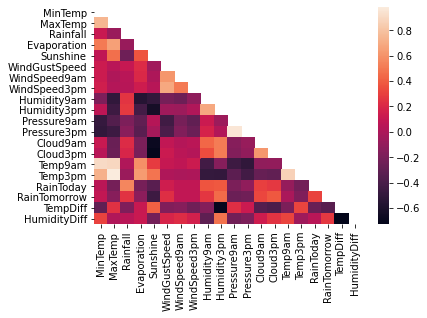

In [36]:
import seaborn as sns
import numpy as np

sns.heatmap(data_reduced.corr(), mask=np.triu(data_reduced.corr()))
plt.show()

Portanto, usaremos um modelo de redução de dimensionalidade para lidar com a multicolinearidade.

O modelo escolhido foi um:

# PCA

In [37]:
from sklearn.decomposition import PCA


x_pca = data_reduced.drop(columns="RainTomorrow")
y_pca = data_reduced["RainTomorrow"]

pca = PCA().fit(x_pca)

var = 0
for k, v in enumerate(pca.explained_variance_ratio_):
    var += v

    if k == 0:
        print(f"{k+1} componente explica {var * 100 :.2f}% da variância")

    else:
        print(f"{k+1} componentes explicam {var * 100 :.2f}% da variância")

1 componente explica 41.57% da variância
2 componentes explicam 66.59% da variância
3 componentes explicam 79.76% da variância
4 componentes explicam 88.65% da variância
5 componentes explicam 91.66% da variância
6 componentes explicam 94.18% da variância
7 componentes explicam 96.22% da variância
8 componentes explicam 97.91% da variância
9 componentes explicam 98.63% da variância
10 componentes explicam 99.06% da variância
11 componentes explicam 99.43% da variância
12 componentes explicam 99.61% da variância
13 componentes explicam 99.77% da variância
14 componentes explicam 99.89% da variância
15 componentes explicam 99.96% da variância
16 componentes explicam 99.99% da variância
17 componentes explicam 100.00% da variância
18 componentes explicam 100.00% da variância
19 componentes explicam 100.00% da variância


Serão usados 4 componentes, pois o 5º explica apenas ~3% da variabilidade.

In [38]:
x_pca = pca.transform(x_pca)
x_pca = pd.DataFrame(x_pca, index=y_pca.index).iloc[:, :4]
dataPca = x_pca.join(y_pca, how="left")
dataPca.head() 


,0,1,2,3,RainTomorrow
6049,60.151001,18.016787,-9.792814,6.447290,0.0
6050,56.315854,-2.516566,-5.824030,-1.049687,0.0
6052,42.873003,6.531455,2.130445,10.991556,0.0
6053,42.997436,0.509039,-22.256338,16.079091,0.0
6054,59.918668,19.128516,-22.353756,12.312047,0.0


In [39]:
gnb2 = ModeloGNB(dataPca)

dataPcaNorm = x_pca.apply(minmax_scale).join(y_pca, how="left") # Novamente normalizando os dados

mnb2 = ModeloMNB(dataPcaNorm)
logReg2 = ModeloRegressaoLogistica(dataPca)
rf2 = ModeloRandomForest(dataPca)

In [40]:
def montarTabela(gnbScore, mnbScore, reglogScore, rf2Score):
    tabela = pd.Series([gnbScore, mnbScore, reglogScore, rf2Score]).to_list()

    precision = [tabela[i][0] for i in range(4)]
    recall = [tabela[i][1] for i in range(4)]
    fscore = [tabela[i][0] for i in range(4)]
    support = [tabela[i][0] for i in range(4)]

    return pd.DataFrame({
        "Precision|0": [round(i[0], 3) for i in precision],
        "Precision|1": [round(i[1], 3) for i in precision],
        "Recall|0": [round(i[0], 3) for i in recall],
        "Recall|1": [round(i[1], 3) for i in recall],
        "F-score|0": [round(i[0], 3) for i in fscore],
        "F-score|1": [round(i[1], 3) for i in fscore],
        "Support|0": [round(i[0], 3) for i in support],
        "Support|1": [round(i[1], 3) for i in support],
    }, index=["Gaussian NB", "Multinomial NB", "Regressão Logística", "Random Forest"])

tab2 = montarTabela(gnb2.Scores, mnb2.Scores, logReg2.Scores, rf2.Scores)
tab2

,Precision|0,Precision|1,Recall|0,Recall|1,F-score|0,F-score|1,Support|0,Support|1
Gaussian NB,0.859,0.746,0.959,0.437,0.859,0.746,0.859,0.746
Multinomial NB,0.782,0.000,1.000,0.000,0.782,0.000,0.782,0.000
Regressão Logística,0.865,0.742,0.954,0.468,0.865,0.742,0.865,0.742
Random Forest,0.866,0.709,0.946,0.475,0.866,0.709,0.866,0.709


# Rebalanceamento dos Dados

A variável dependente é desbalanceada, o que pode prejudicar a qualidade de alguns modelos, como a regressão logística.

Para corrigir esse problema usaremos as ferramentas de oversampling do pacote imblearn.

In [41]:
from imblearn.over_sampling import SMOTE


x_smote = data_reduced.drop(columns="RainTomorrow")
y_smote = data_reduced["RainTomorrow"]

smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(x_smote, y_smote)

dataSmote = pd.DataFrame(x_smote, index=y_smote.index)
dataSmote = dataSmote.apply(minmax_scale)
dataSmote = dataSmote.join(y_smote)
dataSmote["RainTomorrow"].value_counts()

1.0    45361
0.0    45361
Name: RainTomorrow, dtype: int64

In [42]:
gnb3 = ModeloGNB(dataSmote)
mnb3 = ModeloMNB(dataSmote)
logReg3 = ModeloRegressaoLogistica(dataSmote)
rf3 = ModeloRandomForest(dataSmote)

In [43]:
tab3 = montarTabela(gnb3.Scores, mnb3.Scores, logReg3.Scores, rf3.Scores)
tab3

,Precision|0,Precision|1,Recall|0,Recall|1,F-score|0,F-score|1,Support|0,Support|1
Gaussian NB,0.762,0.779,0.782,0.759,0.762,0.779,0.762,0.779
Multinomial NB,0.727,0.756,0.767,0.715,0.727,0.756,0.727,0.756
Regressão Logística,0.789,0.804,0.806,0.786,0.789,0.804,0.789,0.804
Random Forest,0.911,0.903,0.900,0.913,0.911,0.903,0.911,0.903


# Conclusões

In [44]:
tab2.iloc[1, :] = "-"

tab1.index.name = "Modelos Base"
tab2.index.name = "com PCA"
tab3.index.name = "com Reamostragem"

display(tab1)
display(tab2)
display(tab3)

print("* As estatísticas do modelo Bayesiano Multinomial com PCA foram retiradas \
pois o modelo não se ajustou corretamente aos dados reduzidos por PCA e normalizados.")

,Precision|0,Precision|1,Recall|0,Recall|1,F-score|0,F-score|1,Support|0,Support|1
Modelo Base,,,,,,,,
Ingênua,0.782,0.000,1.000,0.000,0.782,0.000,0.782,0.000
Gaussian NB,0.910,0.549,0.839,0.704,0.910,0.549,0.910,0.549
Multinomial NB,0.907,0.528,0.827,0.695,0.907,0.528,0.907,0.528
Regressão Logística,0.877,0.733,0.947,0.526,0.877,0.733,0.877,0.733
Random Forest,0.879,0.768,0.955,0.530,0.879,0.768,0.879,0.768


,Precision|0,Precision|1,Recall|0,Recall|1,F-score|0,F-score|1,Support|0,Support|1
com PCA,,,,,,,,
Gaussian NB,0.859,0.746,0.959,0.437,0.859,0.746,0.859,0.746
Multinomial NB,-,-,-,-,-,-,-,-
Regressão Logística,0.865,0.742,0.954,0.468,0.865,0.742,0.865,0.742
Random Forest,0.866,0.709,0.946,0.475,0.866,0.709,0.866,0.709


,Precision|0,Precision|1,Recall|0,Recall|1,F-score|0,F-score|1,Support|0,Support|1
com Reamostragem,,,,,,,,
Gaussian NB,0.762,0.779,0.782,0.759,0.762,0.779,0.762,0.779
Multinomial NB,0.727,0.756,0.767,0.715,0.727,0.756,0.727,0.756
Regressão Logística,0.789,0.804,0.806,0.786,0.789,0.804,0.789,0.804
Random Forest,0.911,0.903,0.900,0.913,0.911,0.903,0.911,0.903


* As estatísticas do modelo Bayesiano Multinomial com PCA foram retiradas pois o modelo não se ajustou corretamente aos dados reduzidos por PCA e normalizados.


Considerando o F-score - que teoricamente balanceia a Precisão e o Recall - então, dos modelos base, a média dos F-scores dos modelos de regressão logística e Random Forest são bem próximas e superiores ao Naive Bayes Gausiiano e multinomial.

A inclusão do PCA parece melhorar significativamente a performance do modelo Gaussiano, mas nem tanto dos modelos logístico e Random Forest.

Já a inclusão da Reamostragem, não parece melhorar de forma significativa a performance dos modelos, com exceção do Random Forest, que parece ter uma performance impressionante.

A primeira vista, o modelo mais apropriado parece ser o Random Forest com reamostragem. Entretanto, não podemos afirmar isso, visto que testamos uma grande quantidade de modelos e esse bom resultado pode ser produto dessa amostra.